# DS5220 Homework 02 - KAVANA VENKATESH

---

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
import scipy.io
import warnings 
warnings.filterwarnings( "ignore" )   

### Import Dataset

In [2]:
# Read the .mat dataset and load it
mat= scipy.io.loadmat("C:\\Users\\kava2\\Downloads\\ds5220_hw02_data\\hw02_dataset.mat")

# Split the dataset into train and test data sets
X_train = np.array(mat['X_trn'])
Y_train = np.array(mat['Y_trn'])
X_test = np.array(mat['X_tst'])
Y_test = np.array(mat['Y_tst'])

---

## Solution 7

## 7.a)

### Build the Logistic Regression Model using Gradient Descent

In [3]:
# Logistic Regression 
class Logistic_Regression: 
    def __init__( self, learning_rate, iterations ) :         
        self.learning_rate = learning_rate         
        self.iterations = iterations 
          
    # Function for model training     
    def fit( self, X, Y ) :         
        # no_of_training_examples, no_of_features         
        self.m, self.n = X.shape         
        # weight initialization         
        self.W = np.zeros( self.n )         
        self.b = 0        
        self.X = X         
        self.Y = Y 
          
        
        # Gradient descent learning           
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    
    # Helper function to update weights in gradient descent   
    def update_weights( self ) :            
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) 
          
        # calculate gradients         
        tmp = ( A - self.Y.T )         
        tmp = np.reshape( tmp, self.m )         
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m  
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self
      
    
    # Hypothetical function  h( x )    
    def predict( self, X ) :     
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )         
        Y = np.where( Z > 0.5, 1, 0 )         
        return Y       

### Helper Function to Calculate Classification Error

In [4]:
# Get classification error
def classification_error(Y, Y_pred):
    count=0
    for i in range(len(Y)):
        if Y[i]==Y_pred[i]:
            count += 1
    return (len(Y)-count)/len(Y)

### Helper Function to Plot the Logistic Regression Decision Boundary

In [5]:
def plot_regression(X_set, y_set, title_label):
    X0, X1 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X0, X1, model.predict(np.array([X0.ravel(), X1.ravel()]).T).reshape(X0.shape),
                 alpha = 0.75, cmap = ListedColormap(('green', 'red')))
    plt.xlim(X0.min(), X0.max())
    plt.ylim(X1.min(), X1.max())
    x_0 = X_set[np.where(y_set == 0)[0]] 
    x_1 = X_set[np.where(y_set == 1)[0]] 
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1',alpha = .7) 
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='g', label='y = 0') 
    
    plt.title(title_label)
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

## 7.b)

### Training the Logistic Regression Model on the Training Data Set
#### Calculating the Classification Error on the Train and Test Data

In [6]:
# Model training     
model = Logistic_Regression( learning_rate = 0.01, iterations = 1000 ) 

# Fitting the model on our training data
model.fit( X_train, Y_train )

# Prediction on training data set 
Y_pred_train = model.predict( X_train ) 
    
# Get the classification error on the training data set
training_error= classification_error(Y_train, Y_pred_train)
print("The classification error on the training set:", training_error)
    
# Prediction on the test data set
Y_pred_test = model.predict(X_test)
    
# Get the classification error on the test data set
test_error= classification_error(Y_test, Y_pred_test)
print("The classification error on the test set:", test_error)   

The classification error on the training set: 0.031746031746031744
The classification error on the test set: 0.07142857142857142


## Visualizing the training set results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

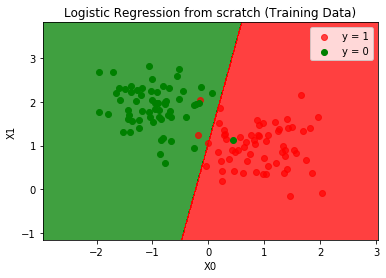

In [21]:
# Plot the Logistic Regression results for the training data set
plot_regression(X_train, Y_train, "Logistic Regression from scratch (Training Data)")

## Visualizing the test results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

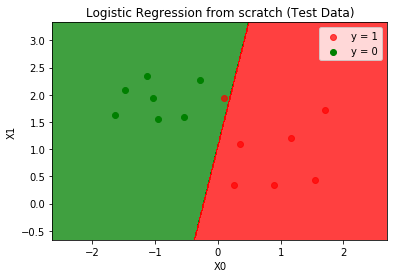

In [8]:
# Plot the Logistic Regression results for the test data set
plot_regression(X_test, Y_test, "Logistic Regression from scratch (Test Data)")

## Solution 8

## 8.a)

In [9]:
# Fit the Logistic Regression Model from sklearn on the training Data
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Predict results on the Training data
y_pred_train= classifier.predict(X_train)

# Get the classification error on the training data set
training_error= classification_error(Y_train, y_pred_train)
print("The classification error on the training set:", training_error)

The classification error on the training set: 0.031746031746031744


In [11]:
# Predict the results on the test data
y_pred_test= classifier.predict(X_test)

# Get the classification error on the test data set
test_error= classification_error(Y_test, y_pred_test)
print("The classification error on the test set:", test_error)   

The classification error on the test set: 0.07142857142857142


## Helper Function to Plot the sklearn Model Results

In [12]:
def plot_regression_sk(X_set, y_set, title_label):
    X0, X1 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X0, X1, classifier.predict(np.array([X0.ravel(), X1.ravel()]).T).reshape(X0.shape),
                 alpha = 0.75, cmap = ListedColormap(('green', 'red')))
    plt.xlim(X0.min(), X0.max())
    plt.ylim(X1.min(), X1.max())
    x_0 = X_set[np.where(y_set == 0)[0]] 
    x_1 = X_set[np.where(y_set == 1)[0]] 
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1',alpha = .7) 
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='g', label='y = 0') 
    
    plt.title(title_label)
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

## Visualizing the Training test results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

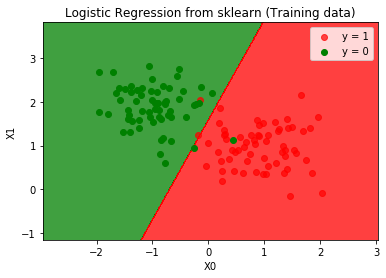

In [13]:
plot_regression_sk(X_train, Y_train, "Logistic Regression from sklearn (Training data)")

## Visualizing the test test results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

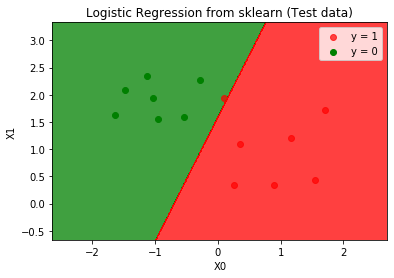

In [14]:
plot_regression_sk(X_test, Y_test, "Logistic Regression from sklearn (Test data)")

### Observation:

#### We can observe that the training and test classification error for both our self-developed Logistic Regression model and the one we imported from sklearn are the same, indicating that our model is pretty good.

## 8.b)

## Naive Bayes Classifier

In [15]:
# Training the Naive Bayes Classifier on the Training Data
bayes = GaussianNB()
bayes.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
# Predicting results on the training data
y_pred_train= bayes.predict(X_train)

# Get the classification error on the training data set
training_error= classification_error(Y_train, y_pred_train)
print("The classification error on the training set:", training_error)

The classification error on the training set: 0.023809523809523808


In [17]:
# Predict the results on the test data
y_pred_test= bayes.predict(X_test)

# Get the classification error on the test data set
test_error= classification_error(Y_test, y_pred_test)
print("The classification error on the test set:", test_error)   

The classification error on the test set: 0.07142857142857142


## Helper Function to Plot the Naive Bayes Model Results

In [18]:
def plot_regression_nb(X_set, y_set, title_label):
    X0, X1 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X0, X1, bayes.predict(np.array([X0.ravel(), X1.ravel()]).T).reshape(X0.shape),
                 alpha = 0.75, cmap = ListedColormap(('green', 'red')))
    plt.xlim(X0.min(), X0.max())
    plt.ylim(X1.min(), X1.max())
    x_0 = X_set[np.where(y_set == 0)[0]] 
    x_1 = X_set[np.where(y_set == 1)[0]] 
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1',alpha = .7) 
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='g', label='y = 0') 
    
    plt.title(title_label)
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

## Visualizing the Training test results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

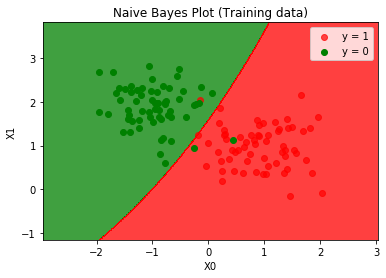

In [19]:
plot_regression_nb(X_train, Y_train, "Naive Bayes Plot (Training data)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

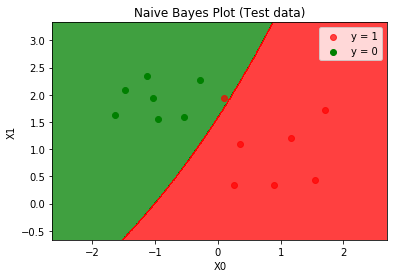

In [20]:
plot_regression_nb(X_test, Y_test, "Naive Bayes Plot (Test data)")

### Observation:

#### We can observe that the training classification error in case of Naive Bayes is slightly less than the Logistic Regression Model, though the test classification error is the same. 